In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time 

In [2]:
df = pd.read_csv('.\processed_data.csv')
X = df['text'].astype("U").str.lower()
y = df['sentiment']

### TF-IDF vectorization

In [3]:
t1 = time.time()
vector = TfidfVectorizer(sublinear_tf=True)
X = vector.fit_transform(X)

print(f'Number of feature words: {len(vector.get_feature_names_out())}')
print(f'Time: {round(time.time()-t1)} seconds')
print(X.shape)
print(y.shape)

Number of feature words: 282278
Time: 12 seconds
(1600000, 282278)
(1600000,)


### Split training and testing data

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=2022)

### Model evaluation

In [5]:
def evaluate(model):
    #accuracy of model on training and test data
    acc_train=model.score(X_train, y_train)
    acc_test=model.score(X_test, y_test)
    print(f'Accuracy of model on training data: {acc_train*100}%')
    print(f'Accuracy of model on testing data: {acc_test*100}% \n')

    # Predict values for Test dataset
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)

    categories  = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    sns.heatmap(cf_matrix, annot = labels, cmap='Blues', fmt = '', xticklabels = categories, yticklabels = categories)

    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

### LR

Time to fit: 19 seconds.
Accuracy of model on training data: 80.43058823529412%
Accuracy of model on testing data: 78.42625% 

              precision    recall  f1-score   support

           0       0.80      0.76      0.78    119959
           1       0.77      0.80      0.79    120041

    accuracy                           0.78    240000
   macro avg       0.78      0.78      0.78    240000
weighted avg       0.78      0.78      0.78    240000



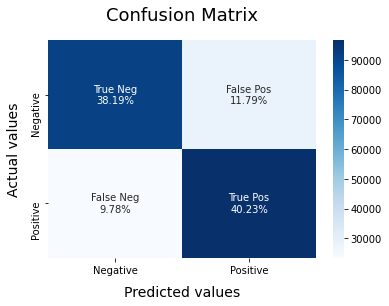

In [6]:
t0 = time.time()
# according to documentation, saga solver is faster for larger datasets
model_lr = LogisticRegression(solver='saga', n_jobs=-1).fit(X_train,y_train)
print(f'Time to fit: {round(time.time()-t0)} seconds.') 
evaluate(model_lr) 

### SVM

Time to fit: 19 seconds.
Accuracy of model on training data: 82.8427205882353%
Accuracy of model on testing data: 77.76708333333333% 

              precision    recall  f1-score   support

           0       0.79      0.76      0.77    119959
           1       0.77      0.80      0.78    120041

    accuracy                           0.78    240000
   macro avg       0.78      0.78      0.78    240000
weighted avg       0.78      0.78      0.78    240000



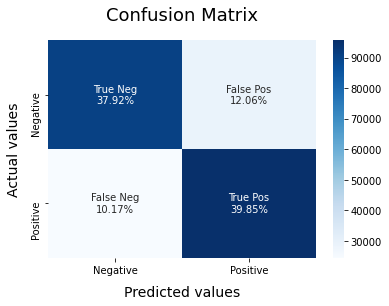

In [7]:
t0 = time.time()
model_svm = LinearSVC().fit(X_train, y_train)
print(f'Time to fit: {round(time.time()-t0)} seconds.')
evaluate(model_svm)

### Bernoulli NB

Time to fit: 0 seconds.
Accuracy of model on training data: 81.0541911764706%
Accuracy of model on testing data: 76.07625% 

              precision    recall  f1-score   support

           0       0.76      0.76      0.76    119959
           1       0.76      0.76      0.76    120041

    accuracy                           0.76    240000
   macro avg       0.76      0.76      0.76    240000
weighted avg       0.76      0.76      0.76    240000



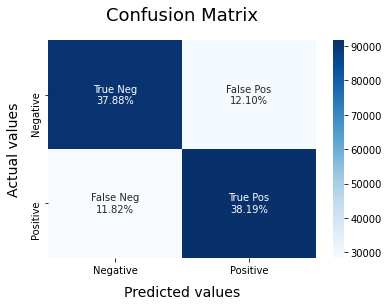

In [8]:
t0 = time.time()
model_nb = BernoulliNB(alpha=.01, fit_prior=False).fit(X_train, y_train)
print(f'Time to fit: {round(time.time()-t0)} seconds.')
evaluate(model_nb)

### Export Models

In [9]:
file = open('vectorizer.pickle', 'wb')
pickle.dump(vector, file)
file.close()

file = open('lr.pickle', 'wb')
pickle.dump(model_lr, file)
file.close()

file = open('svm.pickle', 'wb')
pickle.dump(model_svm, file)
file.close()

file = open('nb.pickle', 'wb')
pickle.dump(model_nb, file)
file.close()

In [10]:
review = """This model works nicely"""
review_vector = vector.transform([review]) # vectorizing
print(model_lr.predict(review_vector)) # 0 is negative, 1 is positive
print(model_svm.predict(review_vector)) # 0 is negative, 1 is positive
print(model_nb.predict(review_vector)) # 0 is negative, 1 is positive

[1]
[1]
[1]
